In [1]:
# set up hsds server, .hscfg problem is fixed with fix in personal slack.   
import pandas as pd
import os

import math
import numpy as np

# show multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 100)

# cufflings for easy pandas df plotting (optional)
import cufflinks as cl

cl.go_offline()

import matplotlib.pyplot as plt

from rex import WindX
from rex import Resource
import h5pyd
import rex
from rex import MultiFileResourceX, ResourceX, MultiTimeResourceX

In [4]:
folder = "/nrel/sup3rcc/"
with h5pyd.Folder(folder) as f:
    print(f"\n {folder}:")
    for i in range(len(list(f))):
        print(list(f)[i])



 /nrel/sup3rcc/:
conus_ecearth3_ssp585_r1i1p1f1
conus_mriesm20_ssp585_r1i1p1f1


In [3]:
folder = "/nrel/sup3rcc/conus_ecearth3_ssp585_r1i1p1f1/"
with h5pyd.Folder(folder) as f:
    print(f"\n {folder}:")
    for i in range(len(list(f))):
        print(list(f)[i])



 /nrel/sup3rcc/conus_ecearth3_ssp585_r1i1p1f1/:
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2015.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2016.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2017.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2018.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2019.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2020.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2021.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2022.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2023.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2024.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2025.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2026.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2027.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2028.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2029.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2030.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2031.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2032.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2033.h5
sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2034.h5
sup3rcc_con

In [5]:
# Creating example plot (getting and plotting data, using cufflinks)
## select resource file
filename = "/nrel/sup3rcc/conus_ecearth3_ssp585_r1i1p1f1/sup3rcc_conus_ecearth3_ssp585_r1i1p1f1_2017.h5"
res = ResourceX(filename, hsds=True)

coords = {'FAR_WEST': (31, -103),
          'WEST': (31.25, -99.75),
          'NORTH': (34, -98.5),
          'NORTH_C': (32,-97.25),
          'SOUTH_C': (29.75, -97.75),
          'SOUTH': (27.75, -98.25),
          'EAST': (31.75, -95.25),
          'COAST': (29.5, -95.75)}

tx_df = res.meta[res.meta['state'].str.lower() == 'texas'].copy()

In [6]:

#Two Routes: 
#    1. Assigning all rows a cluster point via clustering by coords.keys()
#    2. Just finding the point closest to the centroid. 

coords_keys = np.array(list(coords.keys()))
coords_vals = np.array(list(coords.values()))

#Assignment of clusters (route 1)
#cluster_assignments = []
#for index, row in tx_df[['latitude', 'longitude']].iterrows():
#    idx = np.argmin([np.linalg.norm(tuple(row) - x) for x in coords_vals])
#    cluster_assignments.append(str(coords_keys[idx]))
#tx_df['cluster'] = cluster_assignments


# Finding the closest points to centroids
cluster_gids = np.zeros(len(coords_keys), dtype=int)
cluster_mins = np.full(len(coords_keys), 500, dtype=float)
for index, row in tx_df[['latitude', 'longitude']].iterrows():
    arr = [np.linalg.norm(tuple(row) - x) for x in coords_vals]
    idx = np.argmin(arr)
    if np.min(arr) < cluster_mins[idx]:
        cluster_mins[idx] = np.min(arr)
        cluster_gids[idx] = index
cluster_gids

array([1656925, 1636340, 1410985, 1574329, 1760611, 1923894, 1595100,
       1781383])

In [7]:
var = "temperature_2m"
ti = res.time_index

#df = res1.meta[res.meta['state'].str.lower() == 'texas'].copy()
df = pd.DataFrame(res[var, :, cluster_gids], index = ti, columns=coords_keys)

<Axes: >

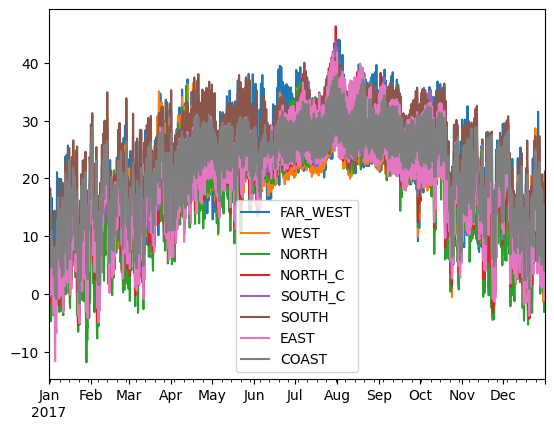

In [8]:
df.plot()

In [28]:
# Checking folder sup3rcc
!hsls /nrel/sup3rcc/

nrel_admin                                          folder   2023-04-20 17:56:35 /nrel/sup3rcc/
nrel_admin                                          folder   2023-09-05 14:13:38 /nrel/sup3rcc/conus_ecearth3_ssp585_r1i1p1f1/
nrel_admin                                          folder   2023-04-20 17:57:53 /nrel/sup3rcc/conus_mriesm20_ssp585_r1i1p1f1/
3 items


In [6]:
with h5pyd.Folder('/nrel/sup3rcc/') as f:
    print(list(f))

['conus_ecearth3_ssp585_r1i1p1f1', 'conus_mriesm20_ssp585_r1i1p1f1']
